Practical 8: Implement Ensemble Learning approach to enhance the accuracy for Small Image Classification problem.

Displaying some sample images from the dataset:


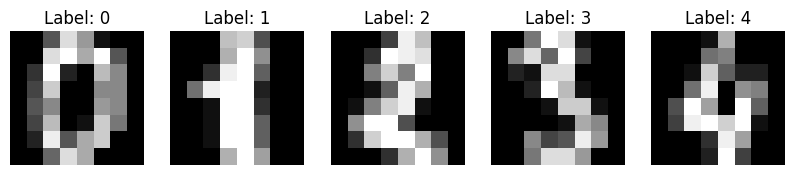

In [ ]:
#GRADIENT BOOSTING
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the dataset
digits = load_digits()
X, y = digits.data, digits.target

print("Displaying some sample images from the dataset:")
fig, axes = plt.subplots(1, 5, figsize=(10, 3))
for i, ax in enumerate(axes):
    ax.imshow(digits.images[i], cmap='gray')
    ax.set_title(f"Label: {y[i]}")
    ax.axis('off')
plt.show()


In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize three different classifiers as weak learners
rf_clf = RandomForestClassifier(n_estimators=10, max_depth=5, random_state=42)
log_clf = LogisticRegression(max_iter=1000, random_state=42)
svc_clf = SVC(probability=True, kernel='linear', random_state=42)

# Combine the weak learners using VotingClassifier
ensemble_model = VotingClassifier(estimators=[('rf', rf_clf), ('log', log_clf), ('svc', svc_clf)], voting='soft')
ensemble_model.fit(X_train, y_train)

# Make predictions and evaluate accuracy
y_pred = ensemble_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy of Ensemble Model (GBM): {accuracy:.4f}")

Accuracy of Ensemble Model (GBM): 0.9741


In [ ]:
#BAGGING
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

digits = load_digits()
X, y = digits.data, digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a base classifier (Decision Tree) for Bagging
base_classifier = DecisionTreeClassifier()

# Initialize the BaggingClassifier with the base classifier
bagging_classifier = BaggingClassifier(base_classifier, n_estimators=50, random_state=42)

# Train the Bagging model
bagging_classifier.fit(X_train, y_train)

y_pred = bagging_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Bagging Classifier on Digits Dataset:", accuracy)


Accuracy of Bagging Classifier on Digits Dataset: 0.9574074074074074
